### **실습과제**
### **Section. Linear Regression & Loss Fuction<br>**

### **(1) Linear Regression & Loss Function**


In [1]:
%matplotlib inline
import numpy as np #숫자, 벡터, 행렬연산 기능 제공
import pandas as pd # 데이터 조작 및 분석을 위한 pandas 라이브러리
import tensorflow as tf  #딥러닝 라이브러리
import matplotlib.pyplot as plt #그래프

In [2]:
visit_df = pd.DataFrame([
    [9859, 487],
    [12132,622],
    [14078,966],
    [16430,1130]],
    columns=["first_visit","second_visit"])
visit_df.index = ["A월드","B랜드","C베이","D월드"]
visit_df

# E세상 첫방문 13000 일때 재방문 횟수는 ?

,first_visit,second_visit
A월드,9859,487
B랜드,12132,622
C베이,14078,966
D월드,16430,1130


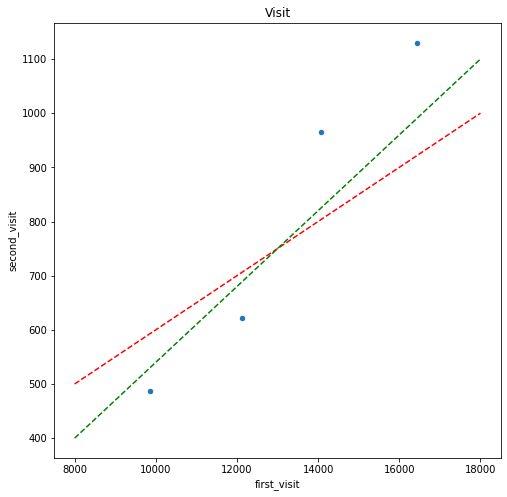

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

visit_df.plot(x="first_visit",y="second_visit",
              kind="scatter", ax=ax, title="Visit")

plt.plot([8000,18000],[500,1000],'r--') # y_red = 0.05*x+100
plt.plot([8000,18000],[400,1100],'g--') # y_green = 0.07*x-160

plt.show()

#### 문제1. Loss Function을 통해 오차가 가장 작은 식을 판별해 보시오.

In [4]:
# 1. 예측함수 설정하기 (힌트: lambda 사용)
# Fix Me

# 2. 예측결과 출력하기
visit_df['red 예측 결과'] = visit_df.second_visit.apply(predict_by_red)
visit_df['green 예측 결과'] = visit_df.second_visit.apply(predict_by_green)
# 3. 오차 출력하기 (힌트: 실제값 - 출력값)
# Fix Me

# 4. 출력
visit_df

,first_visit,second_visit,red 예측 결과,green 예측 결과,red error,green error
A월드,9859,487,124.35,-125.91,362.65,612.91
B랜드,12132,622,131.10,-116.46,490.90,738.46
C베이,14078,966,148.30,-92.38,817.70,1058.38
D월드,16430,1130,156.50,-80.90,973.50,1210.90


In [5]:
# 5. MSE 오차제공평균 적용하여 판별하기
# Fix Me


red error      497208.343125
green error    876857.218525
dtype: float64

In [6]:
# MSE 함수 만들기
def calculate_MSE(W0, W1):
    X = visit_df.first_visit # 독립 변수, 보고싶어요 수
    y_true = visit_df.second_visit # 실제값

    y_pred = W1*X+W0
    return ((y_true - y_pred)**2).mean() # MSE

In [7]:
W0s = np.linspace(-1000,1000,100)
W1s = np.linspace(-1,1,100)

# meshgrid를 사용하여 가중치 조합 만들기
# Fix me


print("가중치 조합(w0, w1)의 갯수 : ", points.shape[0])
print(points)

가중치 조합(w0, w1)의 갯수 :  10000
[[-1000.           -1.       ]
 [ -979.7979798    -1.       ]
 [ -959.5959596    -1.       ]
 ...
 [  959.5959596     1.       ]
 [  979.7979798     1.       ]
 [ 1000.            1.       ]]


In [8]:
losses = []
for W0, W1 in points:
    loss = calculate_MSE(W0, W1)
    losses.append(loss)
losses = np.array(losses)
visit_with_loss = np.concatenate([points,
                                   losses.reshape(-1,1)],
                                  axis=1)
loss_df = pd.DataFrame(visit_with_loss,columns=['W0','W1','Loss'])
loss_df.sort_values('Loss').iloc[0] # Loss가 가장 작은 weight

W0      -656.565657
W1         0.111111
Loss    3015.236915
Name: 5517, dtype: float64

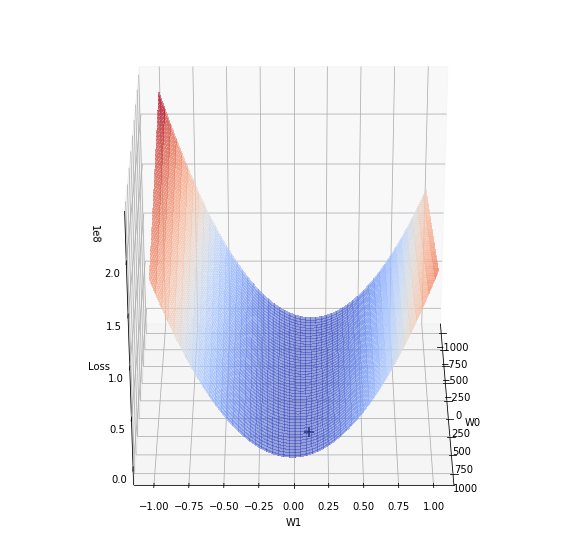

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

surf_value = loss_df.values.reshape(100,100,3)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(656.565657, 0.111111, 3015.236915, 
           s=100, c='black', marker='+', zorder=-1)

surf = ax.plot_surface(X=surf_value[:,:,0],
                       Y=surf_value[:,:,1],
                       Z=surf_value[:,:,2],
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False,
                       alpha=0.5,)
ax.view_init(azim=0)
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Loss')
plt.show()

### **(2) Gradient Descent**<br>
#### **w0_new = w1 - alpha * dw0**
#### **w1_new = w1 - alpha * dw1** <br>
#### 위 경사하강식에 대입하기 위해 아래 코드가 필요합니다.

#### (1) Weight 미분식 (dw0, dw1)

In [10]:
# 초기값 설정
w0 = -500 # Fix Me
w1 = -0.05 # Fix Me

In [11]:
#dW0 = (W1 * X + W0 - y_true).mean()
#dW1 = ((W1 * X + W0 - y_true)*x).mean()
# W0에 대한 미분식
def calculate_w0_derivative(w0,w1):
    x = visit_df.first_visit # 독립 변수
    y_true = visit_df.second_visit # 실제값
    return (w1*x + w0 - y_true).mean()

# W1에 대한 미분식
def calculate_w1_derivative(w0,w1):
    x = visit_df.first_visit # 독립 변수
    y_true = visit_df.second_visit # 실제값
    return ((w1*x + w0 - y_true)*x).mean()

In [12]:
# w0_new, w1_new 식
alpha = 2e-10 # Fix Me
dw0 = calculate_w0_derivative(w0,w1)
dw1 = calculate_w1_derivative(w0,w1)
new_w0 = w0 - alpha * dw0
new_w1 = w1 - alpha * dw1

In [13]:
mse = calculate_MSE(w0,w1)
print('old 오차값: ', mse)

dw0 = calculate_w0_derivative(w0,w1)
dw1 = calculate_w1_derivative(w0,w1)
new_w0 = w0 - alpha * dw0
new_w1 = w1 - alpha * dw1

mse = calculate_MSE(new_w0, new_w1)
print('new 오차값: ', mse)

old 오차값:  3974157.055625
new 오차값:  3696236.2199290367


In [14]:
# 갱신된 weight와 mse 저장
w0_history = [w0]
w1_history = [w1]
mse_history = [mse]

alpha = 2e-10 # # Fix Me 학습률
epoch = 100 # # Fix Me 몇 번 학습할지

for i in range(epoch):
    # 이전 가중치 가져오기
    old_w0 = w0_history[-1]
    old_w1 = w1_history[-1]
    
    # 미분값 갱신
    dw0 = calculate_w0_derivative(old_w0,old_w1)
    dw1 = calculate_w1_derivative(old_w0,old_w1)
    
    # 경사하강법을 통한 가중치 갱신
    new_w0 = old_w0 - alpha * dw0
    new_w1 = old_w1 - alpha * dw1
    new_mse = calculate_MSE(new_w0,new_w1)
    
    # 결과 저장
    w0_history.append(new_w0)
    w1_history.append(new_w1)
    mse_history.append(new_mse)

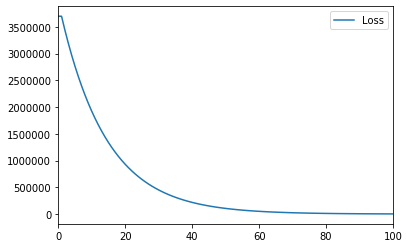

In [15]:
hist_df = pd.DataFrame({
    "W0":w0_history,
    "W1":w1_history,
    "Loss":mse_history
})
hist_df.plot(y='Loss')
plt.show()

In [16]:
hist_df.sort_values('Loss').iloc[0]

W0      -499.999989
W1         0.095344
Loss    5690.140965
Name: 100, dtype: float64

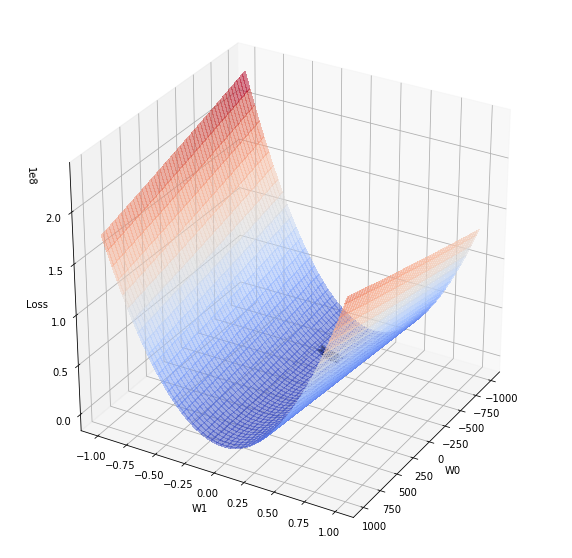

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(hist_df.W0, hist_df.W1, hist_df.Loss, 
           s=100, c='black', marker='+', zorder=-1)

surf = ax.plot_surface(X=surf_value[:,:,0],
                       Y=surf_value[:,:,1],
                       Z=surf_value[:,:,2],
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False,
                       alpha=0.5,)
ax.view_init(azim=30)
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('Loss')
plt.show()

In [20]:
W0=      -799.999986
W1=         0.121417
y = W1*13000+W0
print(y)

778.421014


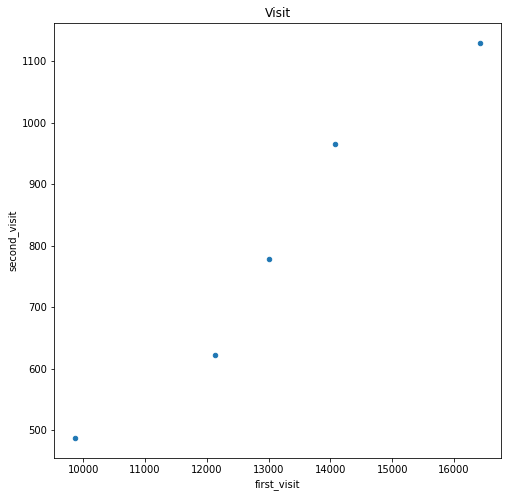

In [21]:
visit_df = pd.DataFrame([
    [9859, 487],
    [12132,622],
    [14078,966],
    [16430,1130],
    [13000, y]],
    columns=["first_visit","second_visit"])
visit_df.index = ["A월드","B랜드","C베이","D월드","E세상"]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

visit_df.plot(x="first_visit",y="second_visit",
              kind="scatter", ax=ax, title="Visit")
plt.show()